In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Simple LM model

In [2]:
def min_sq(x, y):
    x_bar, y_bar = np.mean(x), np.mean(y)
    beta_1 = np.dot(y - y_bar, x - x_bar) / np.linalg.norm(x - x_bar)**2
    beta_0 = y_bar - beta_1 * x_bar
    return [beta_1, beta_0]

In [3]:
np.random.seed(91)
N = 100

a = np.random.normal(loc=2, scale=1, size=N)
b = np.random.randn(1)
x = np.random.randn(N)
y = a * x + b + np.random.randn(N)

a1, b1 = min_sq(x, y)
print(a1, b)

2.203817943318935 [-0.6781313]


In [4]:
xx = x - np.mean(x)
yy = y - np.mean(y)

a2, b2 = min_sq(xx, yy)
print(a2, b2)

2.203817943318935 2.936254619112371e-17


In [5]:
x_seq = np.arange(-5, 5, 0.1)
y_pre = b1 + x_seq * a1
yy_pre = b2 + x_seq * a2

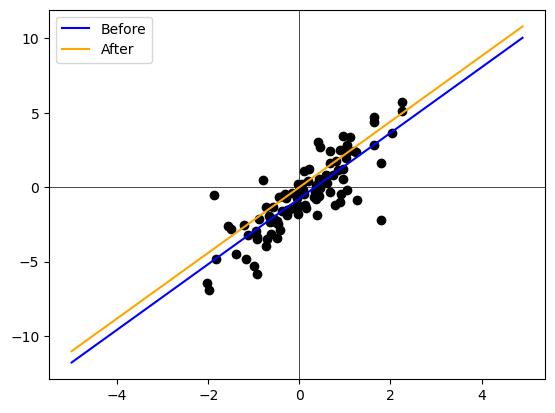

In [6]:
plt.scatter(x, y, c='black')
plt.axhline(y=0, c='black', linewidth=0.5)
plt.axvline(x=0, c='black', linewidth=0.5)
plt.plot(x_seq, y_pre, c='blue', label='Before')
plt.plot(x_seq, yy_pre, c='orange', label='After')
plt.legend(loc='upper left')

## Multiple Regression

In [7]:
N = 100
p = 2
beta = np.array([1, 2, 3])
x = np.random.randn(N, p)
y = beta[0] + beta[1] * x[:, 0] + beta[2] * x[:, 1] + np.random.randn(N)
X = np.insert(x, 0, 1, axis=1)

np.linalg.inv(X.T@X)@X.T@y

array([0.90278533, 1.7945634 , 2.99273718])

## Distributions

In [8]:
import scipy as sc

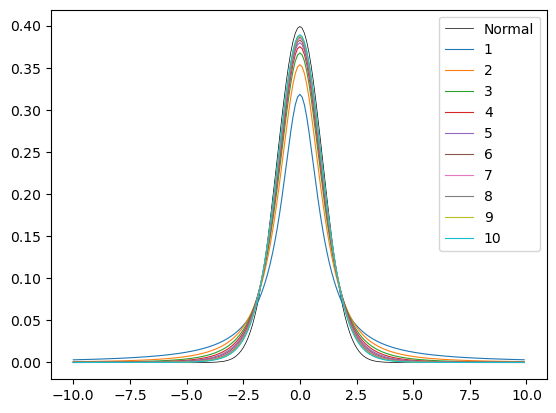

In [9]:
x = np.arange(-10, 10, 0.1)
plt.plot(x, sc.stats.norm.pdf(x, 0, 1), label='Normal', color='black', linewidth=0.5)
for i in range(1, 11):
    plt.plot(x, sc.stats.t.pdf(x, i), label='{}'.format(i), linewidth=0.8)

plt.legend(loc='upper right')

Text(0, 0.5, 'beta_1')

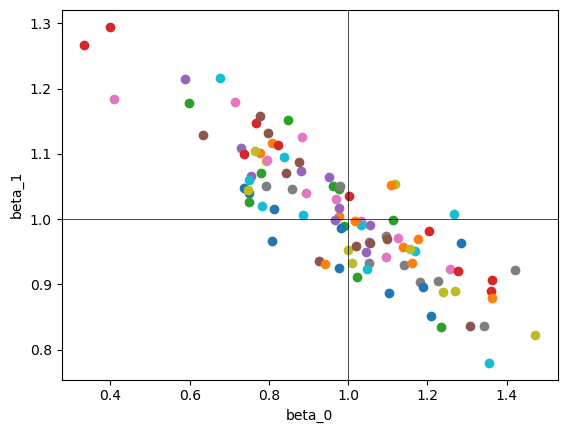

In [10]:
n = 100
p = 1
x_1 = np.zeros(100)
x_2 = np.zeros(100)

for i in range(100):
    x = np.random.randn(n) + 2
    e = np.random.randn(n)
    y = x + 1 + e
    b_1, b_0 = min_sq(x, y)
    x_1[i] = b_0
    x_2[i] = b_1
    plt.scatter(b_0, b_1)

plt.axhline(y=1, c='black', linewidth=0.5)
plt.axvline(x=1, c='black', linewidth=0.5)
plt.xlabel('beta_0')
plt.ylabel('beta_1')


In [11]:
np.corrcoef(x_1, x_2)

array([[ 1.        , -0.87431835],
       [-0.87431835,  1.        ]])

## Hypothesis Testing

$$
H_0 : \beta_i = 0
\\
H_1 : \beta_i \neq 0
$$

$\alpha = 0.05$

In [12]:
n = 100

x = np.random.randn(n)
y = np.random.randn(n)
beta_1, beta_0 = min_sq(x, y)

X = x.reshape(-1, 1)
X = np.insert(X, 0, 1, axis=1)

RSS = np.linalg.norm(y - x*beta_1 - beta_0)**2
RSE = np.sqrt(RSS / (n - 2))

B_0 = np.linalg.inv(X.T@X)[0, 0]
B_1 = np.linalg.inv(X.T@X)[1, 1]

se_0 = np.sqrt(B_0) * RSE
se_1 = np.sqrt(B_1) * RSE

t_0 = beta_0 / se_0
t_1 = beta_1 / se_1

p_0 = 2 * (1 - sc.stats.t.cdf(np.abs(t_0), n - 2))
p_1 = 2 * (1 - sc.stats.t.cdf(np.abs(t_1), n - 2))

In [13]:
import statsmodels.api as sm

In [14]:
model = sm.OLS(y, X)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8943
Date:                Sun, 28 Sep 2025   Prob (F-statistic):              0.347
Time:                        12:45:33   Log-Likelihood:                -120.32
No. Observations:                 100   AIC:                             244.6
Df Residuals:                      98   BIC:                             249.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0986      0.082     -1.206      0.2

$\beta_1 = 0$

Text(0, 0.5, 'probability density')

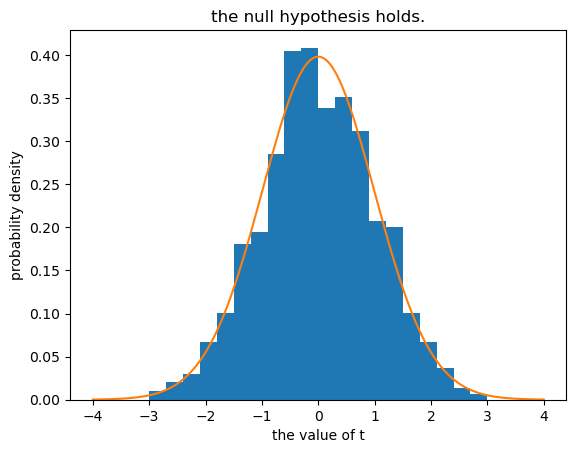

In [15]:
n = 100
r = 1000
T = []
for i in range(r):
    x = np.random.randn(N)
    y = np.random.randn(N)
    X = np.insert(x.reshape(-1, 1), 0, 1, axis=1)

    beta_1, beta_0 = min_sq(x, y)
    pred_y = x*beta_1 + beta_0

    RSS = np.linalg.norm(y - pred_y)**2
    RSE = np.sqrt(RSS / (n - 2))

    B_0 = np.linalg.inv(X.T@X)[0, 0]
    B_1 = np.linalg.inv(X.T@X)[1, 1]

    se_1 = RSE * np.sqrt(B_1)
    T.append(beta_1 / se_1)

plt.hist(T, bins=20, range=(-3, 3), density=True)
x = np.linspace(-4, 4, 400)
plt.plot(x, sc.stats.t.pdf(x, n - 2))
plt.title("the null hypothesis holds.")
plt.xlabel('the value of t')
plt.ylabel('probability density')

Text(0, 0.5, 'probability density')

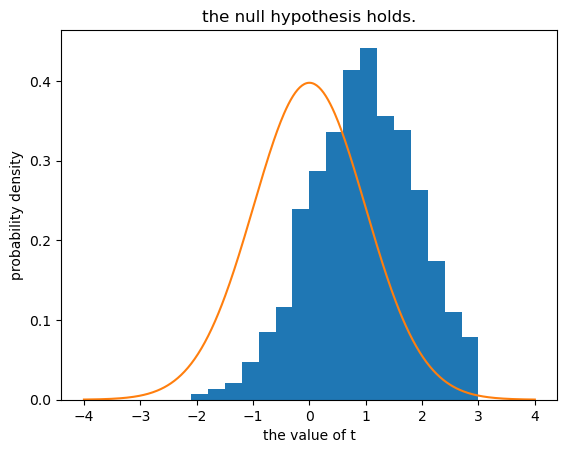

In [16]:
n = 100
r = 1000
T = []
for i in range(r):
    x = np.random.randn(N)
    y = np.random.randn(N) + x*0.1
    X = np.insert(x.reshape(-1, 1), 0, 1, axis=1)

    beta_1, beta_0 = min_sq(x, y)
    pred_y = x*beta_1 + beta_0

    RSS = np.linalg.norm(y - pred_y)**2
    RSE = np.sqrt(RSS / (n - 2))

    B_0 = np.linalg.inv(X.T@X)[0, 0]
    B_1 = np.linalg.inv(X.T@X)[1, 1]

    se_1 = RSE * np.sqrt(B_1)
    T.append(beta_1 / se_1)

plt.hist(T, bins=20, range=(-3, 3), density=True)
x = np.linspace(-4, 4, 400)
plt.plot(x, sc.stats.t.pdf(x, n - 2))
plt.title("the null hypothesis holds.")
plt.xlabel('the value of t')
plt.ylabel('probability density')

## Coefficient of Determination and the Detection of Collinearity

In [17]:
def R2(x, y):
    X = np.insert(x, 0, 1, axis=1)
    n, p = X.shape
    beta = np.linalg.inv(X.T@X)@X.T@y
    y_hat = X@beta
    y_bar = np.mean(y)
    TSS = np.linalg.norm(y - y_bar)**2
    RSS = np.linalg.norm(y_hat - y)**2

    return 1 - RSS / TSS

In [18]:
x = np.random.randn(100, 1)
y = np.random.randn(100)

R2(x, y)

np.float64(0.0011743523437434122)

In [19]:
np.corrcoef(x.reshape(100), y)**2

array([[1.        , 0.00117435],
       [0.00117435, 1.        ]])

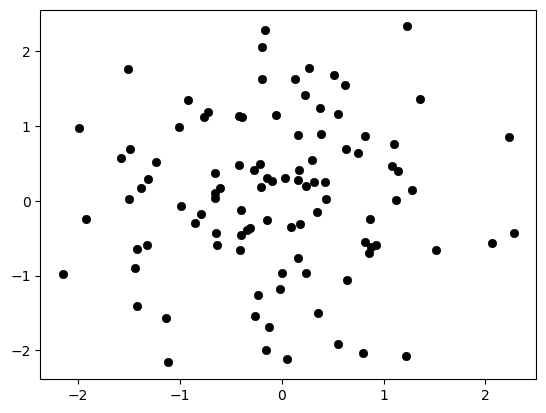

In [20]:
plt.scatter(x, y, color='black', linewidth=0.5)

## VIF

In [21]:
from sklearn.datasets import load_diabetes

In [22]:
x = load_diabetes().data
y = load_diabetes().target

In [23]:
p = x.shape[1]

In [24]:
def VIF(x):
    p = x.shape[1]
    values = []
    for i in range(p):
        S = list(set(range(p)) - {i})
        r2 = R2(x[:, S], x[:, i])
        values.append(1 / (1 - r2))
    
    return np.array(values)

In [25]:
vif = VIF(x)
vif

array([ 1.21730651,  1.27807102,  1.50943737,  1.45942778, 59.20251013,
       39.19336997, 15.40215601,  8.89098636, 10.07596713,  1.48462261])

In [26]:
r2 = 1 - (1 / vif.astype(float))
r2

array([0.17851421, 0.21757086, 0.3375015 , 0.31479994, 0.98310882,
       0.97448548, 0.93507402, 0.88752654, 0.90075394, 0.32642815])

In [27]:
R2(x, y)

np.float64(0.5177484222203498)

In [28]:
R2(x[:, [0, 1, 2, 3, 8]], y)

np.float64(0.48720445288727154)

## Confidence and Prediction Intervals

In [34]:
N = 100
p = 1
X = np.random.randn(N, p)
X = np.insert(X, 0, 1, axis=1)
beta = np.array([1, 1])
epsilon = np.random.randn(N)
y = X@beta + epsilon

In [37]:
U = np.linalg.inv(X.T@X)
beta_hat = U@X.T@y
RSS = np.linalg.norm((X@beta_hat - y))**2
RSE = np.sqrt(RSS / (N - p - 1))
alpha = 0.05

In [39]:
def f(x, a):
    x = np.array([1, x])
    t = sc.stats.t.ppf(0.975, df=N - p - 1)
    the_range = t * RSE * np.sqrt(a + x@U@x.T)
    lower = x@beta_hat - the_range
    upper = x@beta_hat + the_range
    return ([lower, upper])

In [45]:
x_seq = np.arange(-10, 10, 0.1)

lower_seq1 = []
upper_seq1 = []
for i in range(len(x_seq)):
    res = f(x_seq[i], 0)
    lower_seq1.append(res[0])
    upper_seq1.append(res[1])

lower_seq2 = []
upper_seq2 = []
for i in range(len(x_seq)):
    res = f(x_seq[i], 1)
    lower_seq2.append(res[0])
    upper_seq2.append(res[1])

yy = beta_hat[0] + beta_hat[1]* x_seq

Text(0, 0.5, 'y')

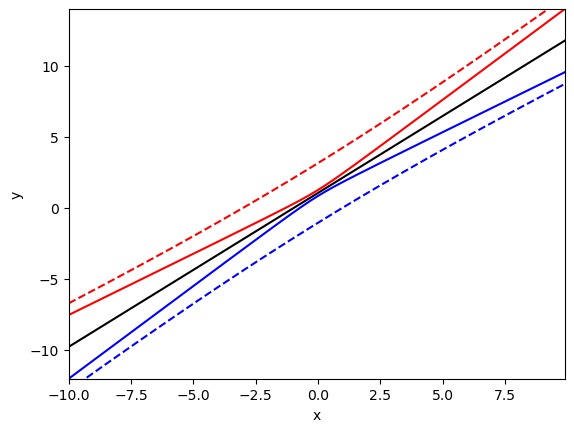

In [54]:
plt.xlim(np.min(x_seq), np.max(x_seq))
plt.ylim(np.min(lower_seq1),np.max(upper_seq1))
plt.plot(x_seq, yy, c='black')
plt.plot(x_seq, lower_seq1, c='blue')
plt.plot(x_seq, upper_seq1, c='red')
plt.plot(x_seq, lower_seq2, c='blue', linestyle='dashed')
plt.plot(x_seq, upper_seq2, c='red', linestyle='dashed')
plt.xlabel('x')
plt.ylabel('y')